In [228]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs import project_config
import matplotlib.pyplot as plt
import seaborn as sns
from configs.RecursiveVPSDE.Markovian_fBiPotDDims_NonSep.recursive_Markovian_PostMeanScore_fBiPot12DimsNS_T256_H05_tl_110data_StbleTgt import get_config


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [229]:
from IPython.core.magic import register_cell_magic


@register_cell_magic
def skip(line, cell):
    return

In [230]:
num_paths = 10240
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
config = get_config()

In [231]:
def get_drift_files(config, root_dir):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/12DDimsNS/"
    true_files = []
    local_files = []
    global_files = []
    for file in os.listdir(root_nadaraya_dir):
        print(file)
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                global_files.append(root_nadaraya_dir+file)
            elif "local" in file:
                local_files.append(root_nadaraya_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    global_files = sorted(global_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, global_files, bws

In [232]:
true_nadaraya_files, local_nadaraya_files, global_nadaraya_files, bws = get_drift_files(config=config, root_dir=root_dir)

IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0055348bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy
.DS_Store
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0041919bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_local_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0041919bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_true_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0073079bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0055348bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_true_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_009649bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_009649bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_true_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0073079bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_local_states.npy
IIDNadaraya_fBiPot_12DDimsNS_DriftTrack_0055348bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_local_states.npy
IIDNadaraya

In [246]:
def get_score_drift_files(root_dir, ts_type):
    root_score_dir = root_dir + f"ExperimentResults/TSPM_Markovian/12DDimsNS/"
    driftoostrack_true_files = []
    driftoostrack_local_files = []
    driftoostrack_global_files = []
    for file in os.listdir(root_score_dir):
        if "_MLP_" in file and ts_type in file:
            if "DriftTrack" in file and "true" in file:
                driftoostrack_true_files.append(root_score_dir+file)
            elif "DriftTrack" in file and "global" in file:
                driftoostrack_global_files.append(root_score_dir+file)
            elif "DriftTrack" in file and "local" in file:
                driftoostrack_local_files.append(root_score_dir+file)
    assert len(driftoostrack_true_files)>0, "No oos drift track files found"
    assert len(driftoostrack_local_files)>0, "No oos drift track files found"
    assert(len(driftoostrack_true_files) == len(driftoostrack_true_files))
    def extract_bw_drift_track_number(s):
        match = s.split("Nep_")[0].split("_")[-1]
        return int(match)
    driftoostrack_true_files = sorted(driftoostrack_true_files, key=extract_bw_drift_track_number)
    driftoostrack_local_files = sorted(driftoostrack_local_files, key=extract_bw_drift_track_number)
    driftoostrack_global_files = sorted(driftoostrack_global_files, key=extract_bw_drift_track_number)
    Nepochs_track = [extract_bw_drift_track_number(f) for f in driftoostrack_true_files]
    idx = np.argwhere(np.array(Nepochs_track)==28).flatten()[0]
    driftoostrack_true_files = driftoostrack_true_files[idx]
    driftoostrack_local_files = driftoostrack_local_files[idx]
    driftoostrack_global_files = driftoostrack_global_files[idx]
    return driftoostrack_true_files, driftoostrack_local_files,driftoostrack_global_files, Nepochs_track

In [247]:
from configs.RecursiveVPSDE.Markovian_fBiPotDDims_NonSep.recursive_Markovian_PostMeanScore_fBiPot12DimsNS_T256_H05_tl_110data_StbleTgt import get_config as get_score_config
score_config = get_score_config()
ts_type = f"ST_{config.feat_thresh:.3f}FTh_fBiPot_{config.ndims}DDimsNS".replace(".", "")
true_score_files, local_score_files, global_score_files, Nepochs_track = get_score_drift_files(ts_type=ts_type, root_dir=root_dir)

In [248]:
local_score_files

'/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/TSPM_Markovian/12DDimsNS/TSPM_MLP_ST_0010FTh_fBiPot_12DDimsNS_OOSDriftTrack_28Nep_00t0_3906e-03dT_025a_-20b_00c_10ResLay_2LFac_BetaMax20e+01_local_states.npy'

In [249]:
score_true = np.load(true_score_files)
score_global = np.load(global_score_files)
score_local = np.load(local_score_files)
nad_true = np.load(true_nadaraya_files[0])
nad_global = np.load(global_nadaraya_files[0])
nad_local = np.load(local_nadaraya_files[0])
score_true=score_true.reshape(-1,score_true.shape[2], score_true.shape[-1])
score_global=score_global.reshape(-1,score_global.shape[2], score_global.shape[-1])
score_local=score_local.reshape(-1,score_local.shape[2], score_local.shape[-1])
nad_true=nad_true.reshape(-1,nad_true.shape[2], nad_true.shape[-1])
nad_global=nad_global.reshape(-1,nad_global.shape[2], nad_global.shape[-1])
nad_local=nad_local.reshape(-1,nad_local.shape[2], nad_local.shape[-1])
true_paths = np.load(score_config.data_path)

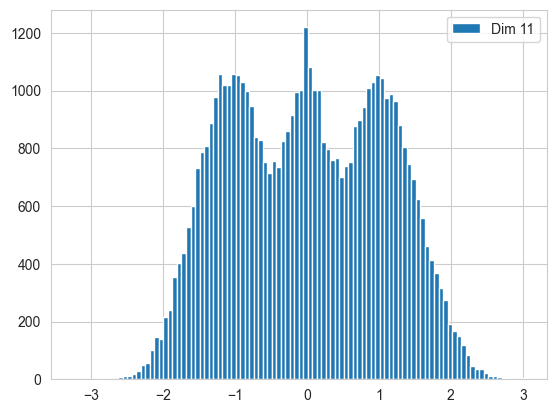

In [260]:
#plt.hist(score_global[:, :, 0].flatten(), bins=1)
for d in range(score_true.shape[-1]):
    d=11
    plt.hist(score_true[:, :, d].flatten(), bins=100, label=f"Dim {d}")
    break
plt.legend()
plt.show()
plt.close()

<Axes: >

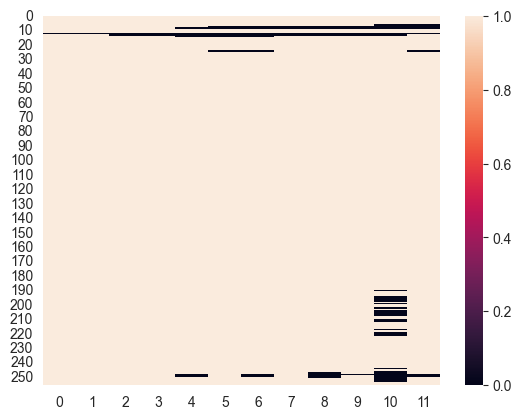

In [251]:
sns.heatmap((np.mean(true_paths, axis=0)< 0.))

<Axes: >

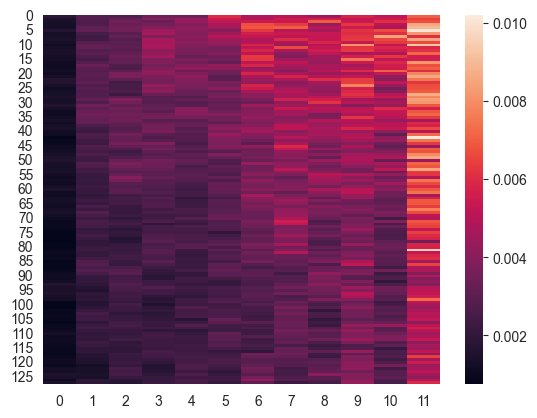

In [252]:
sns.heatmap(np.mean(np.power(score_local - score_true,2)[:,1:,:]/np.linspace(config.deltaT, 1, 256).reshape(1,256,1), axis=0)[128:,:])

In [ ]:
sns.heatmap(np.mean(np.power(nad_local - nad_true,2)[:,1:,:]/np.linspace(config.deltaT, 1, 256).reshape(1,256,1), axis=0)[128:,:])

In [ ]:
%%skip
for d in range(score_global.shape[-1]):
    print(nad_true[:,:, d].flatten().shape)
    plt.hist(score_true[:,1:, d].flatten(), bins=150, color="blue",density=True,label="Score")
    plt.hist(score_global[:,1:, d].flatten(), bins=150, color="red",alpha=0.3,density=True,label="Nad")
    #plt.hist(true_paths[:,:, d].flatten(), bins=150, color="red",density=True,label="True")
    plt.legend()
    plt.show()
    plt.close()

In [ ]:
%%skip
for d in range(score_global.shape[-1]):
    print(nad_true[:,:, d].flatten().shape)
    plt.hist(score_global[:,:, d].flatten(), bins=150, color="blue",density=True,label="Score")
    plt.hist(nad_global[:,:, d].flatten(), bins=150, color="red",alpha=0.3,density=True,label="Nad")
    #plt.hist(true_paths[:,:, d].flatten(), bins=150, color="red",density=True,label="True")
    plt.legend()
    plt.show()
    plt.close()

In [ ]:
def true_drift(config, prev):
    drift_X = -(4. * np.array(config.quartic_coeff) * np.power(prev,
                                                                 3) + 2. * np.array(config.quad_coeff) * prev + np.array(config.const))
    xstar = np.sqrt(
        np.maximum(1e-12, -np.array(config.quad_coeff) / (2.0 * np.array(config.quartic_coeff))))
    s2 = (config.scale * xstar) ** 2 + 1e-12  # (D,) or (K,1,D)
    diff = prev ** 2 - xstar ** 2  # same shape as prev
    phi = np.exp(-(diff ** 2) / (2.0 * s2 * xstar ** 2 + 1e-12))
    phi_prime = phi * (-2.0 * prev * diff / ((config.scale ** 2) * (xstar ** 4 + 1e-12)))
    nbr = np.roll(phi, 1, axis=-1) + np.roll(phi, -1, axis=-1)  # same shape as phi
    drift_X = drift_X - 0.5 * config.coupling * phi_prime * nbr
    return drift_X

In [ ]:
incs = np.concatenate([true_paths[:, [0],:],np.diff(true_paths,axis=1)],axis=1).reshape(-1, true_paths.shape[-1])
pos = true_paths[:, :-1, :].reshape(-1, true_paths.shape[-1])

In [ ]:
for k in range(1000):
    Xtj1 = pos[np.random.choice(np.arange(pos.shape[0]), size=1),:]
    valid_idxs = np.linalg.norm(pos - Xtj1, axis=-1)/np.sqrt(pos.shape[-1]) <= 0.1
    if np.sum(valid_idxs)>2000:
        valid_incs = incs[np.argwhere(valid_idxs).flatten(), :]
        valid_incs_noised = np.exp(-0.25*20)*valid_incs + np.sqrt(1.-np.exp(-0.5*20))*np.random.normal(size=valid_incs.shape)
        for d in range(0,pos.shape[-1], 4):
            plt.hist(pos[np.argwhere(valid_idxs).flatten(), d], label=rf"Dim {d} \pi_0",bins=150)
        plt.legend()
        plt.show()
        plt.close()
        break
        continue
        for d in range(0,pos.shape[-1], 4):
            plt.hist(valid_incs[:, d], label=rf"Dim {d} \pi_0",bins=150)
        plt.legend()
        plt.show()
        plt.close()
        for d in range(0,pos.shape[-1], 4):
            plt.hist(valid_incs_noised[:, d], label=rf"Dim {d} Transition",bins=150)
        plt.legend()
        plt.show()
        plt.close()
emp_means = np.concatenate([np.mean(valid_incs[i:i+100, :],axis=0).reshape(1,-1) for i in range(0,valid_incs.shape[0], 100)], axis=0)

In [ ]:
trued=true_drift(config=config, prev=Xtj1)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.generative_modelling.models.TimeDependentScoreNetworks.ClassConditionalMarkovianTSPostMeanScoreMatching import ConditionalMarkovianTSPostMeanScoreMatching
import torch
score_model = ConditionalMarkovianTSPostMeanScoreMatching(*config.model_parameters)
print(
    config.tdata_mult * sum(p.numel() for p in score_model.parameters() if p.requires_grad) / (config.ts_length - 1))
end_epoch = 56
score_model.load_state_dict(torch.load(config.scoreNet_trained_path + "_EENEp" + str(end_epoch)))
print(emp_means.shape)

In [ ]:
from src.generative_modelling.models.ClassVPSDEDiffusion import VPSDEDiffusion
from tqdm import tqdm
num_paths = 1
mu_hats = []
device = "cpu"
for k in tqdm(range(emp_means.shape[0])):
    features_tensor = torch.stack([torch.tensor(Xtj1.reshape((1, 1, 12)), dtype=torch.float32) for _ in range(1)], dim=0).reshape(
        num_paths * 1, 1, -1).to(device)
    num_taus= 2000
    num_diff_times = 1
    diffusion = VPSDEDiffusion(beta_max=config.beta_max, beta_min=config.beta_min)

    diffusion_times = torch.linspace(config.sample_eps, 1., config.max_diff_steps)
    difftime_idx = config.max_diff_steps - 1
    d = diffusion_times[difftime_idx].to(device)
    diff_times = torch.stack([d for _ in range(num_paths)]).reshape(num_paths * 1).to(device)
    eff_times = diffusion.get_eff_times(diff_times=diff_times).unsqueeze(-1).unsqueeze(-1).to(device)
    vec_diff_times = torch.stack([diff_times for _ in range(num_taus)], dim=0).reshape(num_taus * num_paths)
    vec_eff_times = torch.stack([eff_times for _ in range(num_taus)], dim=0).reshape(num_taus * num_paths, 1, 1)
    vec_conditioner = torch.stack([features_tensor for _ in range(num_taus)], dim=0).reshape(
        num_taus * num_paths,
        1, -1)
    vec_Z_taus = diffusion.prior_sampling(shape=(num_paths * num_taus, 1, config.ts_dims)).to(device)
    score_model.eval()
    with torch.no_grad():
        vec_predicted_score = score_model.forward(times=vec_diff_times, eff_times=vec_eff_times,
                                                  conditioner=vec_conditioner, inputs=vec_Z_taus)
    vec_scores, vec_drift, vec_diffParam = diffusion.get_conditional_reverse_diffusion(x=vec_Z_taus,
                                                                                       predicted_score=vec_predicted_score,
                                                                                       diff_index=torch.Tensor(
                                                                                           [int((
                                                                                                   num_diff_times - 1 - difftime_idx))]).to(
                                                                                           device),
                                                                                       max_diff_steps=config.max_diff_steps)
    # assert np.allclose((scores- predicted_score).detach(), 0)
    ts_step = config.deltaT
    beta_taus = torch.exp(-0.5 * eff_times[0, 0, 0]).to(device)
    sigma_taus = torch.pow(1. - torch.pow(beta_taus, 2), 0.5).to(device)
    vec_scores = (vec_scores + (vec_Z_taus / torch.pow(sigma_taus, 2))) * (torch.pow(sigma_taus,2) / beta_taus)
    final_mu_hats = (-beta_taus * vec_Z_taus / (torch.pow(sigma_taus, 2))) + ((
                                                                    (torch.pow(sigma_taus, 2) + (
                                                                            torch.pow(beta_taus * config.diffusion,
                                                                                      2) * ts_step)) / (
                                                                            ts_step * torch.pow(sigma_taus, 2))) * vec_scores)
    assert (final_mu_hats.shape == (num_taus * num_paths, 1, config.ts_dims))
    means = final_mu_hats.reshape((num_taus, num_paths, config.ts_dims))
    assert (means.shape == (num_taus, num_paths, config.ts_dims))
    final_mu_hats = means.mean(dim=0).reshape(num_paths, 1, config.ts_dims).cpu().numpy()
    mu_hats.append(final_mu_hats)
mu_hats = np.concatenate(mu_hats)[:, 0, :]

In [ ]:
for d in range(0,pos.shape[-1]):
    #plt.hist(emp_means[:, d]/config.deltaT, alpha=0.5,label=rf"Dim {d} Empirical",bins=50)
    #plt.hist(mu_hats[:, d],alpha=0.5,label=rf"Dim {d} Estimator",bins=50)
    plt.vlines(np.mean(emp_means[:, d]/config.deltaT), ymin=0, ymax=plt.gca().get_ylim()[-1], label=rf"Dim {d} Mean of Empirical")
    plt.vlines(trued[:, d], ymin=0, ymax=plt.gca().get_ylim()[-1],label=f"Dim {d} True \mu(x)", color="red")
    plt.vlines(np.mean(mu_hats[:, d]), ymin=0, ymax=plt.gca().get_ylim()[-1],label=f"Dim {d} Mean of Estimator", color="orange")
    plt.legend()
    plt.show()
    plt.close()